Fashion MNIST is a dataset of 70,000 grayscale images of fashion items. Each images is 28*28 pixels and belongs to one of 10 categories.

Categories
0 – T-shirt/top  
1 – Trouser  
2 – Pullover  
3 – Dress  
4 – Coat  
5 – Sandal  
6 – Shirt  
7 – Sneaker  
8 – Bag  
9 – Ankle boot


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


4422102/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5332 - accuracy: 0.8125
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4002 - accuracy: 0.8554
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.8659
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3451 - accuracy: 0.8727
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8778
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.8820
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3070 - accuracy: 0.8867
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2996 - accuracy: 0.8885
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2920 - accuracy: 0.8922
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.283

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')


313/313 - 1s - loss: 0.3521 - accuracy: 0.8766 - 537ms/epoch - 2ms/step

Test accuracy: 0.88


In [8]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 1ms/step


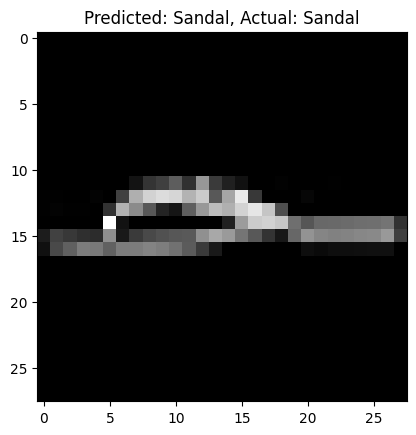

In [13]:
def show_prediction(index):
    plt.imshow(x_test[index], cmap='gray')
    predicted_label = np.argmax(predictions[index])
    actual_label = y_test[index]
    plt.title(f'Predicted: {class_names[predicted_label]}, Actual: {class_names[actual_label]}')
    plt.show()

# Example: View prediction for the 5th image
show_prediction(8)


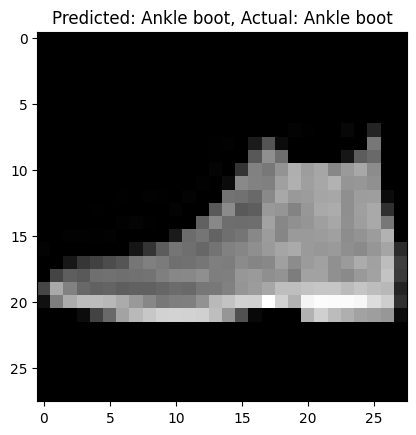

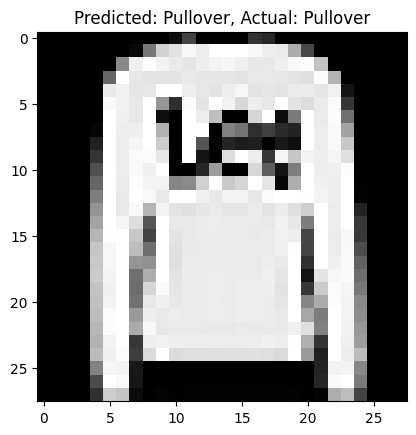

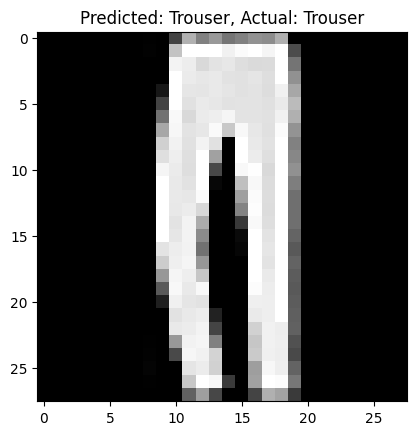

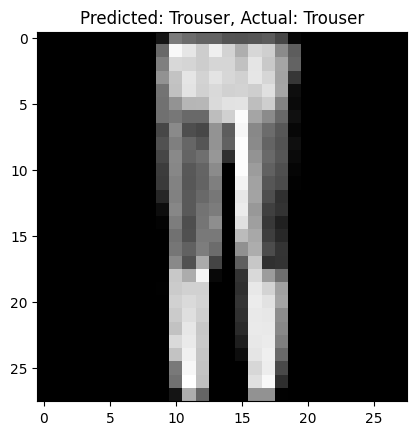

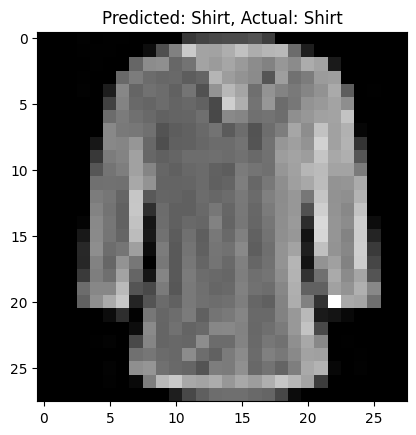

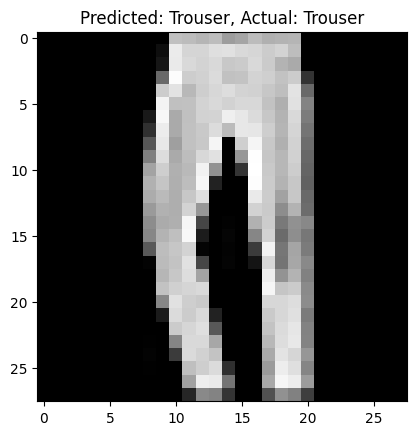

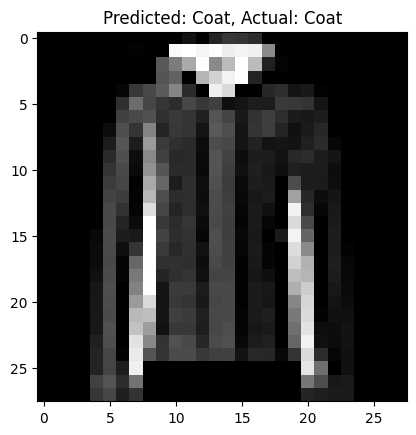

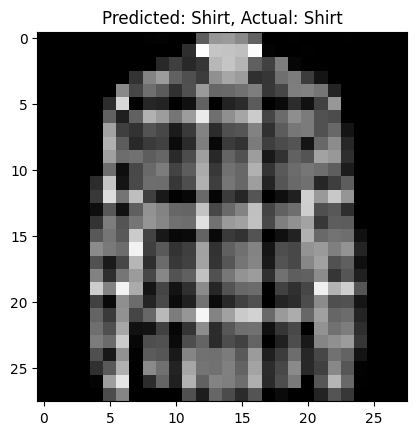

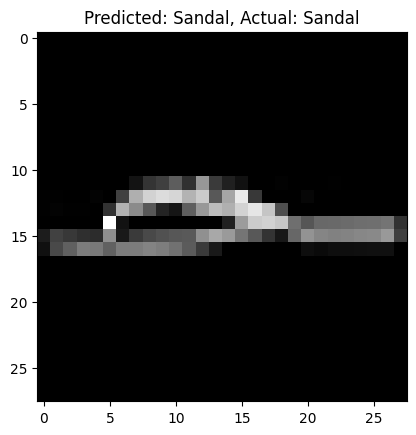

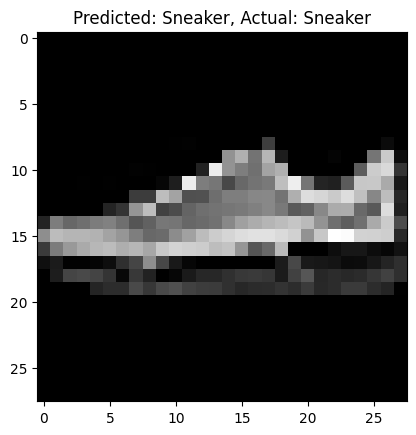

In [14]:
for i in range(10):
    show_prediction(i)
